# Introduction to Bayesian Networks (BNs)



## CSCI E-83
## Stephen Elston

**Bayesian Networks** or **BNs** are one of the most important representations of probabilistic graphical models. BNs are **directed acyclic graphs** or **DAGs** which form a compact **representation** of a joint distribution. Schematically we can view the role of representation in an intelligent agent as shown in the figure below.

<img src="img/Representation.JPG" alt="Drawing" style="width:600px; height:200px"/>
<center> Representation in an intelligent agent </center>

The representation captures the **conditional independence structure** of the joint distribution. Taking advantage of the independency structure of the distribution can greatly reduce the computational complexity of inference for a graphical model. 

The directed nature of the BN can capture **causality**. **Influence** travels along the directed edges of the graph. However, keep in mind, information on independence can flow both directions along the graph.

As a result of the directed edges, the **conditional marginal distribution** of each variable is only dependent on its **parents**. In other words, **belief** is propagated along the DAG from parents to children. In this sense, the DAG is a representation of a **generative sampling process**. 

Graphical models allow us to add **evidence** as data is observed for certain variables. Further, we can perform **queries** on **hidden variables**, variables with no evidence. We will address queries and inference in another lesson.

**Suggested readings:** The following reading is an optional supplement to the material presented here:
- Barber, Sections 3.1, 3.2, 3.3, or
- Murphy, Section 10.1, 10.2.

## Some graph terminology

Before we dive into the probabilistic graphical models let's examine some basic graph terminology. Graphs are are comprised of two types of elements:
1. **Nodes** or **vertices** in probabilistic models contain the distribution information.
2. **Edges** define the relationships between the nodes. Edges can be **directed** or **undirected**. Information flows in the direction specified along a directed edge. Undirected edges have no preferred direction of information flow. 
3. The set of edges of a graph (less nodes) is called the **skeleton**. 
4. Nodes connected by an edge are **neighbors**. 
5. The **degree** of a node is the number of neighbors. 
6. **Parents** are nodes with a directed edge to another node, know as the **child**. Parents are said to have **influence** on their children. 
7. **Ancestors** are nodes which are parents, grandparents, great grandparents, etc, of a with a path of directed edges to a child. 
8. **Descendants** are nodes which receive information from parents or ancestors along a path of directed edges. For example, a child node is a descendant of its parents and grand parents. 
9. **Leaf** nodes have no directed edges to ancestors. 

We can classify graphs by their topology. The figure below shows some basic graph types.   

<img src="img/GraphTypes.JPG" alt="Drawing" style="width:600px; height:200px"/>
<center> **Examples of basic graph types** </center>

Four graph types are illustrated in the figure above:   
1. **Directed acyclic graph** is a graph where all edges are **directed** and there are no **cycles**. Information or **influence** flows in one direction along a directed edge. In the case illustrated, influence flows  $A \rightarrow B$ and $C \rightarrow B$, but not the other way. This makes $A$ and $C$ **ancestors** or **parents** of $B$.   
2. **Directed cyclic graph** has directed edges but contains a cycle. A **cycle** is a directed path that starts and returns to the same node. In this case the illustrated case the cycle is $A \rightarrow B \rightarrow C \rightarrow A$.
3. **Undirected graph** has no directed edges. 
4. **Partially directed graph** has both directed and undirected edges. 


## A simple example

We have already worked on the student GRE score and letter problem. As a reminder, a student would like to make inferences or **queries** on the joint distribution $P(D,I,S,G,L,A)$. Her goal is to . She can make the following assertions about the independencies for this problem: 

1. The degree of difficulty, D, of the machine learning course is **unconditionally independent** of all other variable, $\{D \bot I,S,G,L,A \}$.
2. The intelligence of the student is, I, **unconditionally independent** of all other variable, $\{I \bot D,S,G,L,A \}$.
3. The quality of the student's recommendation letter, L, is **conditionally independent**  of intelligence, her GRE score, and her letter, given her grade, $\{L \bot I,S,D,A\ |\ G\}$.
4. The student's grade in the machine learning course, G, is **conditionally independent** of her GRE score and her letter, give the difficulty of the course and her intelligence, $\{G  \bot S,L\ |\ I,D\}$. 
5. The students GRE scores, S, are **conditionally independent** of her grade, difficulty of the course and letter, given her intelligence, $\{S \bot G,D,L\ |\ I\}$.

Given these independecies, the distribution can be factored as follows:

$$P(D,I,S,G,L) = P(D)\ P(I)\ P(S|I)\ P(G|I,D)\ P(L|G)\ P(A|G,L)$$

It is relatively easy to construct a BN that represents the independencies of this distribution as shown in the figure below.  

<img src="img/LetterDAG.JPG" alt="Drawing" style="width:400px; height:400px"/>
<center> **DAG for the student score and letter distribution** </center>


## Independency and uniqueness of BNs

We have just created a BN with the Independency structure of the distribution defined by the assertions. The independency structure is quite important since imposing independencies can greatly reduce the computational complexity of the graph.   





However, there is no guarantee that a given BN uniquely defines the independency structure of a distribution. A simple example of four BNs representing the same independency structure is shown in the figure below. In each case, the following **conditional independence** assertions are true:

$$A\ \bot\ C\ |\ B\\
Or,\\
C\ \bot\ A\ |\ B$$


<img src="img/Dependency.JPG" alt="Drawing" style="width:600px; height:300px"/>
<center> **Multiple BNs with same dependence structure** </center>

Each of these cases supports that   

1. **Causal or Cascade:** In this case A causes B which causes C. This information is represented in the directed edges, $A \rightarrow B \rightarrow C$. In general, A and C are not independent, or $A \not\perp C$. If B is an evidence variable then A and C are separated and cannot dependent. Once a value is assigned to B, A depends on B and C depends on B, but A and C are **decoupled**. The independency when B is observed is expressed, $A\ \bot\ C\ |\ B$.
2. **Evidential:** The independencies are the same as before, $A\ \bot\ C\ |\ B$, just the direction of the influence changes, $C \rightarrow B \rightarrow A$. Once again, the evidence variable B separates A and C, just as they do in the causal case. In this case, **evidence** is added to the DAG which allows inference of A.   
3. **Common Evidence, V-Structure, or Collider:** In this case, having evidence on B **blocks** the path or **separates** A from C, $A \perp C\ |\ B$ . In other words, knowing B explains away A and C. 
4. **Common Cause or Common Parent:** Here, $B \rightarrow A$ and $B \rightarrow C$. In this case, B is causal to both A and C, making A and C independent, $A \perp C$. However, if B is observed A and B can no longer be independent, $A \not\perp C\ |\ B$ 

A key point here is that any of these DAGs has the same aforementioned independence properties. In other words, multiple DAGs can exhibit the same independencies. We say that these DAGs exhibit **I-equivalence**, since they have the same independencies. 

We can write a generalization of the independence properties of a BN:

> **Definition:** On a graph $G$, the variable $X_i$ is independent of its **nondecendents** given its **parents**, $Pa_{X_i}$. We can say that $G$ includes as set of **local conditional independence assumptions**:

$$I_{\ell}(G): \{X_i\ \bot\ nondescendants_{X_i}\ |\ Pa_{X_i}:\ \forall i\ \}$$



Let's look at some more examples of applying this definition The Figure below illustrates some key cases.

<img src="img/Independencies2.JPG" alt="Drawing" style="width:600px; height:350px"/>
<center> **Multiple BNs with same dependence structure** </center>

Following the numbering of each DAG, we can make make the following assertions (statements) about independencies in each of these DAGs:

1. **$P(A,B,C) = P(B\ |\ A,C)\ P(A)\ P(C)$:** In this case, A and C are causes of B, and are therefore independent.
2. **$P(A,B,C) = P(A\ |\ B)\ P(C\ |\ B)\ P(B)$:** Here, B is the cause of independent effects A and C.
3. **$P(A,B,C) = P(A,C\ |\ B)P(B) = P(A\ |\ B)\ P(C\ |\ B)P(B)$:** A and C are dependent given B. While the causes of A and C are a-priori independent, having evidence for B tells us about both causes A and C. 
4. **$P(A,C\ |\ B) = P(A\ |\ B)\ P(C\ |\ B)$:** A and C are independent when conditioned on B. Given the cause B we know everything about each effect A and C. 
5. **$P(A,B,C,D) = P(A,C\ |\ B,D)P(B|D)P(D) = P(A\ |\ B)\ P(C\ |\ B)P(B|D)P(D)$:** Since D is a descendant of B, this case is the same as 3 above.
6. **$P(A,C) = P(A)\ P(C)$:** A and C are made independent by marginalizing over B. In other words, in the absence of specific information on B, A and C are unconditionally independent.
7. **$P(A,C) \ne P(A)\ P(C)$:** In this case, A and C are dependent when marginalizing out B. In other words the effects, A and C are dependent on B. This relationship can be expressed as:

$$\sum_B p(A,B,C) = p(A)\ p(C)$$   

Or as $A \perp C\ |\ marginal(B)$.



## Using pgmpy for directed graphical model

We can use the Python pgmpy package to create and manipulate Bayesian DAGs. You can find complete documentation on this package [here](http://pgmpy.org/).

If you have not installed pgmpy, un-comment the code in the cell below and execute it.  

> **Note:** If you are on a Windows machine you may need to install PyGraphViz and NetworkX before installing pgmpy. Alternatively, you can use Colab, which uses a Linux operating system.  

In [1]:
#!pip install pgmpy

To import the parts of pgmpy we will use for the examples in this notebook, execute the code in the cell below:

In [20]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

Continuing with the example, we need to define the graph. The first step is to define the **skeleton** of the graph. This is done by defining the edges. Each edge is define as a tuple; (start node, end node). Execute the code in the cell below to create the skeleton of the graph      

In [26]:
## Define the network structure.
## The first value of the tuple defines the origin
## of the connector and the second the terminal point
## of the directed edge. 
student_model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S'), ('L','A'),('S','A')])

Execute the code below to visualize the DAG we have created using the [networkx.drawing.nx_pylab.draw](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) function. 

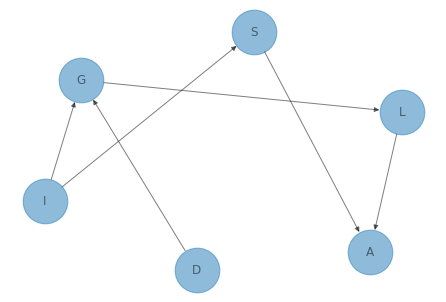

In [27]:
nx.draw(student_model, with_labels=True, alpha=0.5, node_size=2000)

With the graph skeleton defined, we need to specify the probability distributions of the nodes. In this case, we are using discrete distributions.   

We will start with the two independent variables, $D$ and $I$, which are binomially distributed. As there are only two possible states, the **variable cardinality** is set to 2. Notice that the sum of the probabilities must add to 1.0.

In [5]:
## Define the independent variables
CPD_D = TabularCPD(variable='D', variable_card=2, values=[[0.3], [0.7]])
print(CPD_D)
CPD_I = TabularCPD(variable='I', variable_card=2, values=[[0.2], [0.8]])
print(CPD_I)

+------+-----+
| D(0) | 0.3 |
+------+-----+
| D(1) | 0.7 |
+------+-----+
+------+-----+
| I(0) | 0.2 |
+------+-----+
| I(1) | 0.8 |
+------+-----+


Next, we will deal with the children of the two independent variables. We need to define the variables associated with **evidence variables**. An evidence variable is an **observable** variable for which data can be acquired. We will explore observable variables and evidence later.   

The letter variable, $L$, is dependent on the grade $G$. Therefore we say that $G$ is the **evidence** variable. The variable $L$ has two possible states, so we set the variable cardinality to 2, which creates two lists. The evidence variable, $G$, has cardinality of 3, so there are three values for each of the states of the two states $L$.   

In a similar manner we can model the GRE score, $S$, using the evidence variable, Intelligence, $I$.   

The variable $S$ has two possible states, so we set the variable cardinality to 2, which creates two lists. The evidence variable has cardinality of 2, so there are two values for each of the states of the two states $L$.   

Execute the code in the cell below and examine the tables.    

In [6]:
# Define the distributions with a single conditional variable 
# or evidence. 
CPD_L = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.9, 0.6, 0.01],
                           [0.1, 0.4, 0.99]],
                   evidence=['G'], # Leter depends on the grade
                   evidence_card=[3])
print(CPD_L)

CPD_S = TabularCPD(variable='S', variable_card=2,
                   values=[[0.8, 0.1],
                           [0.2, 0.9]],
                   evidence=['I'], # GRE score depneds on intelligence
                   evidence_card=[2])
print(CPD_S)

+------+------+------+------+
| G    | G(0) | G(1) | G(2) |
+------+------+------+------+
| L(0) | 0.9  | 0.6  | 0.01 |
+------+------+------+------+
| L(1) | 0.1  | 0.4  | 0.99 |
+------+------+------+------+
+------+------+------+
| I    | I(0) | I(1) |
+------+------+------+
| S(0) | 0.8  | 0.1  |
+------+------+------+
| S(1) | 0.2  | 0.9  |
+------+------+------+


There are two last variables, Grade, $G$, and Acceptance, $A$. 

For $G$ there are two evidence variables, Intelligence, $I$ and Difficulty, $D$. The $G$ variable has three possible states, or cardinality of 3. Each of the evidence variables has two possible states resulting in 4 values; $4 = 2 * 2$. This relationship leads to a **three dimensional table**, defined by three lists with four values in each list. We can represent this relationship using multiple indices on one axis.   

For $A$ there are also two evidence variables, Letter, $L$, and GRE Score, $S$. Acceptance has a cardinality of only 2, a person is either accepted to a program or not.  

Execute the code in the cell below and examine the resulting table.     

In [31]:
# Define the distributions with a multiple conditional variables 
# or evidence for the probability of recieving a good grade. 
CPD_G = TabularCPD(variable='G', variable_card=3, 
                   values=[[0.3, 0.7,  0.02, 0.2],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.05, 0.9,  0.5]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])
print(CPD_G)

# Define the distributions with a multiple conditional variables 
# or evidence for probability of being admintted. 
CPD_A = TabularCPD(variable='A', variable_card=2, 
                   values=[[0.9, 0.8,  0.7, 0.2],
                           [0.1, 0.2, 0.3, 0.8]],
                  evidence=['L', 'S'],
                  evidence_card=[2, 2])
print(CPD_A)

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
+------+------+------+------+------+
| L    | L(0) | L(0) | L(1) | L(1) |
+------+------+------+------+------+
| S    | S(0) | S(1) | S(0) | S(1) |
+------+------+------+------+------+
| A(0) | 0.9  | 0.8  | 0.7  | 0.2  |
+------+------+------+------+------+
| A(1) | 0.1  | 0.2  | 0.3  | 0.8  |
+------+------+------+------+------+


There is one last step. We need to add the conditional probability tables (CPTs) to the model. Execute the code in the cell below to add the CPTs to the model. 

In [33]:
student_model.add_cpds(CPD_D, CPD_I, CPD_S, CPD_G, CPD_L, CPD_A)
student_model.get_cpds()

[<TabularCPD representing P(D:2) at 0x1b87fb49748>,
 <TabularCPD representing P(I:2) at 0x1b87fa45828>,
 <TabularCPD representing P(S:2 | I:2) at 0x1b87fb49ef0>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x1b8008a5f28>,
 <TabularCPD representing P(L:2 | G:3) at 0x1b87fb49eb8>,
 <TabularCPD representing P(A:2 | L:2, S:2) at 0x1b8008a5668>]

We will now check if the model structure and CPD specifications are consistent. Execute the code below to test the model.  

In [34]:
student_model.check_model()

True

Now, save the model by executing the code in the cell below. 

In [36]:
import pickle
with open('student_model.pickle', 'wb') as pkl:
    pickle.dump(student_model, pkl)

We have now defined the directed graphical model using three steps:
1. Skeleton of the graph with the directed edges,
2. **conditional probability tables** (**CPTs**) for each node, and
3. the evidence variables for some nodes. 

## DAGs and independence maps

We can generalize beyond the above example we can say that a DAG represents a probability distribution **consistent** with the DAG. We can factor the graph:
$$P(X) = \prod_{i=1:d}P(X_i|X_{\pi_i})$$

Where, $P(X)$ is probability distribution, $X_{\pi_i}$ is the set of **parents** of $x_i$, a node on the graph, and $d$. In other notation these **global semantics** can be expressed:    
$$P(X) = \prod_{i=1:d}P(X_i|\{ parents(X_i) \})$$

The we can use the local semantics to map the global semantics and vice versa:    

$$local\ semantics \Longleftrightarrow global\ semantics $$

In other words, in a DAG a node $x_i$ is independent of all other nodes give the set of the node's parents, $X_{\pi_i}$.

We can also generalize the idea of independencies with the **local Markov assumption** applied to a DAG G by writing:

$$I(G) = \{ X \bot Z\ |\ Y:\ dsep_G(X:Z|Y) \} $$ 

This leads us to an important definition of the properties of DAGs:

> **Definition:** A DAG, G, is an **independence map** or **I-map** of a distribution P if $I_l(G) \subseteq I(P)$, where $I(P)$ is the set of independencies of the distribution P and $I_l(G)$ is the set of independencies of the DAG. We can express this relationship as:

$$(X\ \bot\ Y\ |\ Z_G) \Rightarrow (X\ \bot\ Y\ |\ Z_P)$$

We can see that there are multiple DAGs for which $I_l(G) \subseteq I(P)$ can be true.  But, what are the practical implications of this definition? 

From the above definition, you can see that it can be the case that a DAG can be an I-map, but not a complete representation of the independencies of $P$. This leads us to another definition:

>**Definition:** A DAG, G, is a **minimal I-map** for a distribution P if removal of even a single edge renders $G$ not an I-map. 

The concept of an I-map is quite useful. In fact, no graph $G$ can be considered a useful representation of a distribution $P$ if it is not an I-map of $P$. A minimal I-map will have the minimum possible complexity, but may be hard to find in practice. 

Note that a minimal I-map may not be unique for a distribution $P$. If two DAGs have the same I-map, we say they are **I-equivalent**. 

## D-separation

This leads to the following definition:

> **Definition:** Given subsets $X$, $Y$ and $Z$, $X$ and $Y$ are conditionally independent or **D-separated** conditioned on the subset $Z$ if they are separated on the moralized graph. 

The definition leads to another related definition:

> **Definition:** A graph $G$ is a **dependency map** or **D-map** of a distribution $P$ if the graph contains every conditional independence in $P$. We can represent this relationship as:

$$(X\ \bot\ Y\ |\ Z_G) \Leftarrow (X\ \bot\ Y\ |\ Z_P)$$

Recalling the definition of an I-map we can create another definition.

> **Definition:** If a graph $G$ is both an I-map and a D-map of a distribution $P$ we say that $G$ is a **prefect map** of $P$. We can write this relationships as:

$$(X\ \bot\ Y\ |\ Z_G) \Leftrightarrow (X\ \bot\ Y\ |\ Z_P)$$

> **Note:** While it would be nice if a graph were a perfect map of a distribution, this will rarely be the case in real world problems. Thus, a perfect map is mostly useful as a reference point in developing probabilistic graphical models.  

## Trails in DAGs


The concept of **trails** provides another way to think about separation in DAGs. You can think of a trail as a path between one subset of a DAG and another subset of the DAG. If the trail is **active** there is no independency between the  If a trail between subsets is **blocked** the subsets are independent. Trails are blocked by evidence or observed. Following on the previous figure we can define four cases:

1. **Causal trail;** is active if and only if B is not observed. 
2. **Evidential trail;** is active if and only if B is not observed.
3. **Common cause;** is active if and only if B is not observed.
4. **Common effect;** is active if and only if B or one of B's descendants is observed.  

The independencies resulting from trails can be generalized as **d-separation**:

> **Definition:** Let $X$, $Y$ and $Z$ be three subsets of graph G. We say $X$ and $Y$ are **d-separated** given Z if there is no active trail between any node $x \in X$ and any node $y \in Y$ given Z. We can express d-separation as $d-sep_G(X;Y\ |\ Z)$.   

The intuition is that when there is evidence on the trail between subsets, the subset with evidence effectively blocks the trail creating the separation.   

## Bayes ball algorithm

Another way to understand independencies on trails is with the concept of **Bayes' Ball**, also know as the **Bayes Ball algorithm**. The idea is to think about how a ball can move along the trails in the graph. If the ball encounters a blocked trail it bounces back and cannot continue. Following these rules, the independencies in a DAG can be found. 

The rules for the Bayes' ball for basic DAG structures are illustrated below. Evidence variables are shown as shaded. The path of the ball are shown with arrows. Notice that the ball can travel in either direction along the directed edges. Blocked trails are shown with a bar blocking the path of the ball. 

<img src="img/BayesBall.JPG" alt="Drawing" style="width:600px; height:350px"/>
<center> Illustration of using Bayes' ball to find indepenencies </center>
<center> Filled nodes have known values or evidence </center>

Using the 6 rules shown graphically above, we can find all possible independencies of a DAG. With a bit of thought, you should be able to see that these 6 simple rules are the same as the 4 simple cases stated at the beginning of these section. 

We can find the active trails in our example graph by executing the code in the cell below. 

In [38]:
def test_active(current_node):
    print('Active trails from ' + current_node + ' -> ' + str(student_model.active_trail_nodes(current_node)[current_node]))
nodes = ['D','G','S','I','L','A']
for n in nodes: test_active(n)      

Active trails from D -> {'L', 'D', 'A', 'G'}
Active trails from G -> {'L', 'G', 'A', 'S', 'I', 'D'}
Active trails from S -> {'L', 'S', 'A', 'G', 'I'}
Active trails from I -> {'L', 'S', 'A', 'G', 'I'}
Active trails from L -> {'L', 'S', 'A', 'G', 'I', 'D'}
Active trails from A -> {'L', 'S', 'A', 'G', 'I', 'D'}


### Local Independencies 

We can also use the Bayes ball algorithm to find the local independencies of the DAG. These independencies can be conditional or unconditional. To find the independencies for the DAG execute the code in the cell below.  

In [40]:
student_model.local_independencies(['D','G','S','I','L','A'])

(D ⟂ I, S)
(G ⟂ S | I, D)
(S ⟂ L, D, G | I)
(I ⟂ D)
(L ⟂ I, D, S | G)
(A ⟂ I, D, G | L, S)

There are two unconditional independencies and four conditional dependencies. Further, this set of independencies is the **complete I-map** of the graph.  

### D-separation 

The conditional independencies are expressions of d-separation. Execute the code in the cells below to test that the conditional independencies result in d-separations.  

In [22]:
nx.d_separated(student_model, {'G'}, {'S'}, {'I','D'})

True

In [23]:
nx.d_separated(student_model, {'S'}, {'L','D','G'}, {'I'})

True

In [24]:
nx.d_separated(student_model, {'L'}, {'I','D','S'}, {'G'})

True

In [41]:
nx.d_separated(student_model, {'A'}, {'I','D','S'}, {'L','S'})

True

You can see from the above that each independency in the graph is d-separated. 

### Markov Blanket

Another way to consider the dependencies and independencies of the DAG is to consider the Markov blankets of the one or more of the nodes. Execute the code in the cell below to display the Markov blanket of the Grade, $G$, node.    

In [42]:
student_model.get_markov_blanket('G')

['L', 'I', 'D']

## Evidence, hidden variables and queries

Up to now we have only dealt with distributions of the variables in our graphical models. 

It is possible that we will **observe** data values for some variables, which is typically referred to as **evidence**. Evidence provides specific values for **observable variables**. Once we have evidence, the size of the tables we must work with can be reduced. Only entries consistent with the evidence need be retained. Thus, computational complexity can be reduced, sometimes greatly. 

An example of evidence might be a specific score $S$ on the GRE test for a student. If the score is high, $S^1$, then we need not consider table entries with a low GRE score $S^0$.

Not all variables are observable however. We must estimate the marginal distribution of these **unobservable variables** given the evidence. We say that we perform a **query** on the unobservable variables. The query returns the marginal distribution of the variable. 

For example, human intelligence cannot be directly observed. In our student model, we might observe a student's GRE score as $S^1$ and course grade as $G^0$. Given this evidence, we can now query to compute the marginal posterior distribution of the student's intelligence. 



## Uncertain and unreliable evidence

In the real world, evidence can be **uncertain** or **unreliable**. Both of these situations effect the marginal distribution returned by a query on any unobservable variable. 

### Uncertain evidence

First, let's consider the effect of **uncertain evidence**. There are many situations in which uncertain evidence can arise. For example, an observer might only have a certain confidence in an observation. An ornithologist sees a bird, but may only be 70% certain of the species. The quality of the habitat (an unobservable) is a parent of species present. How can we include the uncertainty of the ornithologist's observation into the model? 

A model of habitat quality, $q$, given the species, $s$ can be written:

$$p(q\ |\ s) = \sum_s p(q,s\ |\ \tilde{s}) = \sum_s p(q\ |\ s, \tilde{s})\ p(s\ |\ \tilde{s})$$ 

Now, $q$ is dependent on $s$ independent of the uncertainty of the observation $\tilde{s}$, leading to:

$$\sum_s p(q\ |\ s)\ p(s\ |\ \tilde{s})$$

### Unreliable evidence

Let's say our ornithologist decides her observations are going too slowly and decides to hire an assistant. Unfortunately, the person she hires has exaggerated his bird species identification skills. Thus, this observer is providing **unreliable evidence**. Unfortunately, the ornithologist must now apply a rather abstract and subjective treatment of this unreliable evidence. 

The ornithologist must replace the unreliable evidence with **virtual evidence** or **likelihood evidence**. Mathematically we can express this process as:

$$p(q\ |\ s) = \frac{1}{Z} p(s\ |\ q)\ p(q) \rightarrow \frac{1}{Z} p(H\ |\ q)\ p(q)$$    

where, $Z$ is a normalization or partition function, and $H$ is the fixed virtual evidence selected by the ornithologist. Since $p(H\ |\ q)$ is selected subjectively this cannot be treated as a proper probability distribution. 

> **Note:** The process of using virtual evidence is purely Bayesian. A frequentist would take one of two possible approaches. The simplest approach is simply to remove or **censor** the suspect values from the data set. Alternatively, the suspect values can be **confidence weighted** to account for the suspect values.  

## Knowledge engineering with DAGs

We have seen how DAGs are a powerful and compact representation of joint distributions. But, how do we specify the DAG? There are two distinct aspects of the specification process:

1. The **qualitative specification** which defines the skeleton of the DAG. The skeleton specifies the influences and independencies in the belief network. In many practical situations, creating the qualitative specification is difficult and problematic. There are a number of ways the qualitative specification of a DAG including: 
  - **Prior knowledge** of influence or causal relationships based on knowledge of the probability distributions in the domain. 
  - **Eliciting assessments of experts** as to which variables are influential or causal to other variables. 
  - **Learning** the independence structure of the probability distribution from data. This is a computationally difficult problem of unsupervised learning. Typically, a large amount of data is required.       
      
      
2. The **quantitative specification** which defines the details of the conditional distributions. There are a number of ways to create the quantitative specification of a DAG: 
  - **Prior knowledge** of the conditional distributions.
  - **Empirically determining the conditional distributions** from data. 
  - **Eliciting opinions of experts** as to the likelihood of events. 
  - **Fitting** parameters of a distribution model.    
     
  
It should be noted that multiple methods are often used to create these specifications.   

## Summary of Bayesian network semantics  

We have seen how distributions can be factorized on Bayesian networks. We can make the following statements:

1. Factorization on BNs is based on conditional distributions.  
2. Factorization on a BN implies conditional independencies.   

These facts lead to the following definition:

> **Definition:** Given a distribution $P$ and a Bayesian network $G$, $P$ factorizes as a set of CPTs specified as the nodes of $G$. 

#### Copyright 2018, 2019, 2021, Stephen F Elston. All rights reserved.